<a href="https://colab.research.google.com/github/Myavuzars/MachineLearning/blob/main/Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from numpy import mean

In [3]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning /ltrain.csv")
         

In [6]:
data.head()

,MIS_Status,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx
0,P I F,1122875008,Patty Schwartzkopf Properties,MAMMOTH LAKES,CA,93546,BANK OF AMERICA NATL ASSOC,NC,531210,16413,2005,84,2,1,0,0,1,2,Y,N,16587,11000,0,11000,5500,0,0,0.50000,0,2520,19107
1,P I F,4549584000,HAM DELLES COMPANY INCORPORATE,SANTA ROSA,CA,95401,UMPQUA BANK,OR,531312,15126,2001,300,7,1,0,7,1,1,0,N,15156,866800,0,866800,650100,0,1,0.75000,0,9000,24156
2,P I F,7408914003,"MEGA CORPORATION GROUP,A CALIF",WALNUT,CA,91789,BANK OF AMERICA NATL ASSOC,NC,532230,16195,2004,84,3,1,0,3,1,1,Y,N,16222,77377,0,85000,42500,0,0,0.50000,0,2520,18742
3,P I F,4579774010,STICKS-N-STONES ENTERPRISES,SAN CARLOS,CA,94070,"WACHOVIA SBA LENDING, INC.",CA,531312,15141,2001,300,10,1,0,0,1,1,N,N,15218,800100,0,810000,607500,0,1,0.75000,0,9000,24218
4,P I F,6266254005,PREMIERE PROPERTIES INC,BURLINGAME,CA,94010,U.S. BANK NATIONAL ASSOCIATION,OH,531210,15818,2003,300,2,1,0,2,1,1,0,N,15917,1054200,0,1056200,766917,0,1,0.72611,0,9000,24917


In [7]:
df =data.copy()

In [8]:
df.shape

(855, 31)

In [9]:
def valcounts(col):
  return col.nunique(axis=0)
valcounts(data)


MIS_Status             2
LoanNr_ChkDgt        855
Name                 839
City                 337
State                  1
Zip                  529
Bank                 107
BankState             19
NAICS                 24
ApprovalDate         724
ApprovalFY            23
Term                 134
NoEmp                 53
NewExist               2
CreateJob             33
RetainedJob           45
FranchiseCode         21
UrbanRural             3
RevLineCr              4
LowDoc                 4
DisbursementDate     242
DisbursementGross    516
BalanceGross           1
GrAppv               314
SBA_Appv             357
New                    2
RealEstate             2
Portion               12
Recession              2
daysterm             134
xx                   647
dtype: int64

In [11]:
df.head()

,MIS_Status,City,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm
0,P I F,MAMMOTH LAKES,BANK OF AMERICA NATL ASSOC,NC,531210,2005,84,2,1,0,0,1,2,Y,N,16587,11000,5500,0,0,0.50000,0,2520
1,P I F,SANTA ROSA,UMPQUA BANK,OR,531312,2001,300,7,1,0,7,1,1,0,N,15156,866800,650100,0,1,0.75000,0,9000
2,P I F,WALNUT,BANK OF AMERICA NATL ASSOC,NC,532230,2004,84,3,1,0,3,1,1,Y,N,16222,85000,42500,0,0,0.50000,0,2520
3,P I F,SAN CARLOS,"WACHOVIA SBA LENDING, INC.",CA,531312,2001,300,10,1,0,0,1,1,N,N,15218,810000,607500,0,1,0.75000,0,9000
4,P I F,BURLINGAME,U.S. BANK NATIONAL ASSOCIATION,OH,531210,2003,300,2,1,0,2,1,1,0,N,15917,1056200,766917,0,1,0.72611,0,9000


In [97]:
#Encoding Target Variable
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
y= df["MIS_Status"]
y= encoder.fit_transform(y)


In [13]:
def valcounts(col):
  return col.nunique(axis=0)
ddf =pd.DataFrame(valcounts(df))


typ = pd.DataFrame(df.dtypes)

ndf= pd.concat([ddf,typ], axis=1)
ndf

,0,0
MIS_Status,2,object
City,337,object
Bank,107,object
BankState,19,object
NAICS,24,int64
ApprovalFY,23,int64
Term,134,int64
NoEmp,53,int64
NewExist,2,int64
CreateJob,33,int64


In [14]:
df = data.drop(["State", "BalanceGross", "Zip", "LoanNr_ChkDgt", "Name","ApprovalDate", "xx", "DisbursementGross" ], axis=1)

In [15]:
#cat_ix= df.select_dtypes(include=["object"]).columns
#num_ix= df.select_dtypes(include=[ "int64", "float64"]).columns

In [16]:
cat_vars=["City","Bank","BankState", "NewExist", "UrbanRural","RevLineCr","FranchiseCode","LowDoc", "New", "RealEstate", "Recession","Portion" ] 
num_vars=["NAICS", "ApprovalFY", "Term", "NoEmp", "CreateJob", "RetainedJob", "DisbursementDate","GrAppv", "SBA_Appv", "daysterm"]

#Dealing with Categorical Variables

In [17]:
cat_df= df.drop(["NAICS", "ApprovalFY", "Term", "NoEmp", "CreateJob", "RetainedJob", "DisbursementDate","GrAppv", "SBA_Appv", "daysterm", "MIS_Status"], axis=1)
num_df = df.drop(["City","Bank","BankState", "NewExist", "UrbanRural","RevLineCr","FranchiseCode","LowDoc", "New", "RealEstate", "Recession","Portion","MIS_Status" ], axis=1)
num_df.head()

,NAICS,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,DisbursementDate,GrAppv,SBA_Appv,daysterm
0,531210,2005,84,2,0,0,16587,11000,5500,2520
1,531312,2001,300,7,0,7,15156,866800,650100,9000
2,532230,2004,84,3,0,3,16222,85000,42500,2520
3,531312,2001,300,10,0,0,15218,810000,607500,9000
4,531210,2003,300,2,0,2,15917,1056200,766917,9000


In [19]:
#Encoding
for col in cat_vars:
  df[col] = encoder.fit_transform(df[col])
  cat_df[col] = encoder.fit_transform(cat_df[col])

  



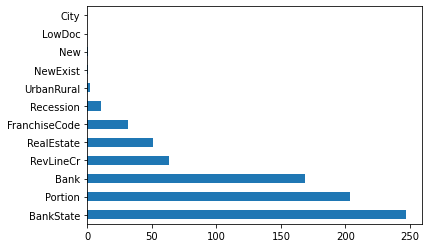

In [20]:
#Chi Square Independency Testing  
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
test = SelectKBest(score_func=chi2, k=12) 
fit = test.fit(cat_df, y)
fit.scores_

imp = pd.Series(fit.scores_, index= cat_df.columns)
imp.nlargest(12).plot(kind="barh")
plt.show()

#We can drop LowDoc since LowDoc and MS_Status ar completely independent.



In [35]:
ndf = df.drop(["LowDoc", "City","New", "NewExist", "UrbanRural", "Recession"], axis=1)
ndf.head()

,MIS_Status,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,RevLineCr,DisbursementDate,GrAppv,SBA_Appv,RealEstate,Portion,daysterm
0,P I F,10,9,0.050,0.727273,0.274510,0.003333,0.0,0.000000,1,3,0.747837,0.002771,0.001538,0,1,0.274510
1,P I F,98,13,0.101,0.545455,0.980392,0.011667,0.0,0.046667,1,0,0.568401,0.367640,0.306638,1,6,0.980392
2,P I F,10,9,0.560,0.681818,0.274510,0.005000,0.0,0.020000,1,3,0.702069,0.034321,0.019051,0,1,0.274510
3,P I F,101,1,0.101,0.545455,0.980392,0.016667,0.0,0.000000,1,1,0.576176,0.343424,0.286475,1,6,0.980392
4,P I F,97,12,0.050,0.636364,0.980392,0.003333,0.0,0.013333,1,0,0.663824,0.448391,0.361930,1,4,0.980392


#Dealing With Numeric Variables

In [24]:
num_df.head()

,NAICS,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,DisbursementDate,GrAppv,SBA_Appv,daysterm
0,531210,2005,84,2,0,0,16587,11000,5500,2520
1,531312,2001,300,7,0,7,15156,866800,650100,9000
2,532230,2004,84,3,0,3,16222,85000,42500,2520
3,531312,2001,300,10,0,0,15218,810000,607500,9000
4,531210,2003,300,2,0,2,15917,1056200,766917,9000


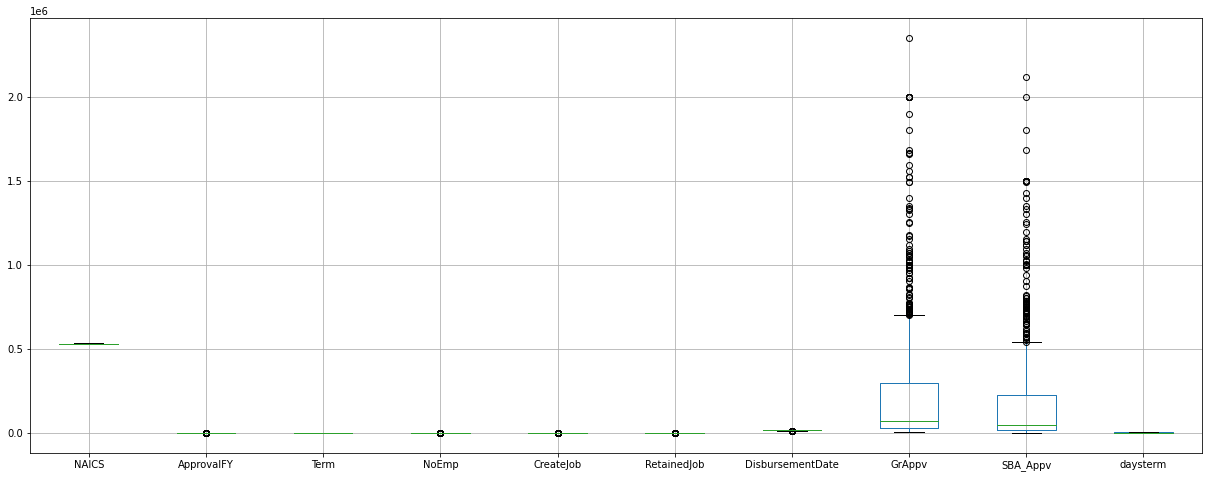

In [25]:
#Boxplot
num_df.boxplot(figsize=(21,8))


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
#df["City"] = scaler.fit_transform(df["City"])
num_df = scaler.fit_transform(num_df)
df.loc[:,num_vars] = scaler.fit_transform(df.loc[:,num_vars])


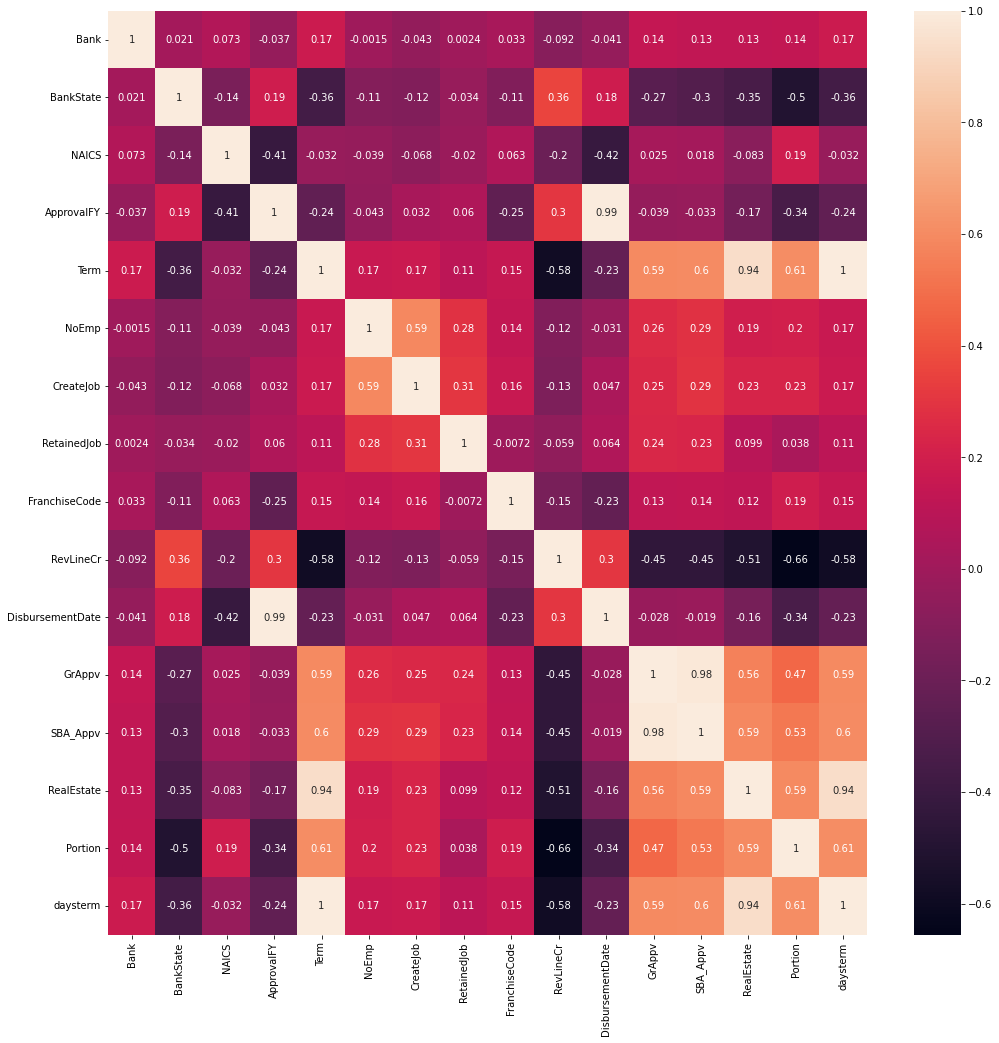

In [38]:
#Pearson Correlation
import seaborn as sns
corrmat =ndf.corr()
corr_features= corrmat.index
plt.figure(figsize=(17,17))
g= sns.heatmap(ndf[corr_features].corr(), annot=True)

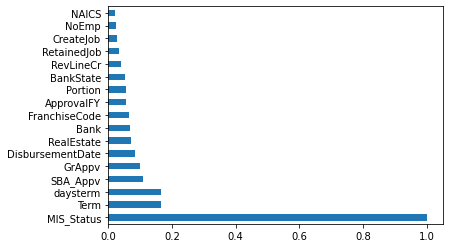

In [40]:
#Mutual Information
from sklearn.metrics import normalized_mutual_info_score
from sklearn.feature_selection import SelectKBest



results = []
for col in ndf.columns:
    result = normalized_mutual_info_score(y, ndf[col])
    results.append(result)
    
    
results
    
importance = pd.Series(results, index= ndf.columns)
importance.nlargest(20).plot(kind="barh")
plt.show()

In [41]:
ndf.drop(["NAICS", "NoEmp", "CreateJob","RetainedJob" ], axis=1, inplace=True)

In [42]:
ndf.head()

,MIS_Status,Bank,BankState,ApprovalFY,Term,FranchiseCode,RevLineCr,DisbursementDate,GrAppv,SBA_Appv,RealEstate,Portion,daysterm
0,P I F,10,9,0.727273,0.274510,1,3,0.747837,0.002771,0.001538,0,1,0.274510
1,P I F,98,13,0.545455,0.980392,1,0,0.568401,0.367640,0.306638,1,6,0.980392
2,P I F,10,9,0.681818,0.274510,1,3,0.702069,0.034321,0.019051,0,1,0.274510
3,P I F,101,1,0.545455,0.980392,1,1,0.576176,0.343424,0.286475,1,6,0.980392
4,P I F,97,12,0.636364,0.980392,1,0,0.663824,0.448391,0.361930,1,4,0.980392


In [55]:
X= ndf.iloc[:,1:]
X.head()

,Bank,BankState,ApprovalFY,Term,FranchiseCode,RevLineCr,DisbursementDate,GrAppv,SBA_Appv,RealEstate,Portion,daysterm
0,10,9,0.727273,0.274510,1,3,0.747837,0.002771,0.001538,0,1,0.274510
1,98,13,0.545455,0.980392,1,0,0.568401,0.367640,0.306638,1,6,0.980392
2,10,9,0.681818,0.274510,1,3,0.702069,0.034321,0.019051,0,1,0.274510
3,101,1,0.545455,0.980392,1,1,0.576176,0.343424,0.286475,1,6,0.980392
4,97,12,0.636364,0.980392,1,0,0.663824,0.448391,0.361930,1,4,0.980392


In [ ]:
#Machine Learning

In [61]:
#Model Function
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
def model_evaluation(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
  Scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
  return Scores


In [74]:
#Dummy Classifier
from sklearn.dummy import DummyClassifier
#Dummy Classifier
model_Dummy= DummyClassifier(strategy='most_frequent')
Dummy_Score= round(mean(model_evaluation(model_Dummy)),3)
print("%0.2f accuracy with a standard deviation of %0.2f" % (Dummy_score.mean(), Dummy_score.std()))

0.62 accuracy with a standard deviation of 0.00


In [77]:
#Decision Tree(DTree) 
from sklearn import tree
model_DTree= tree.DecisionTreeClassifier()

# Evaluate the model
Dtree_Scores = model_evaluation(model_DTree)
# summarize performance
print("%0.2f accuracy with a standard deviation of %0.2f" % (Dtree_Scores.mean(), Dtree_Scores.std()))

0.73 accuracy with a standard deviation of 0.05


In [76]:
#Support Vector Machine (SVM)
from sklearn import svm
from sklearn.svm import SVC
model_SVM= SVC(gamma='scale')

# Evaluate the model
SVM_Scores= model_evaluation(model_SVM)
# summarize performance
print("%0.2f accuracy with a standard deviation of %0.2f" % (SVM_Scores.mean(), SVM_Scores.std()))

0.64 accuracy with a standard deviation of 0.04


In [78]:
#Bagged Decision Trees (BAG)
from sklearn.ensemble import BaggingClassifier
model_BAG =BaggingClassifier(n_estimators=100)

# Evaluate the model
BAG_Scores = model_evaluation(model_BAG)
# summarize performance
print("%0.2f accuracy with a standard deviation of %0.2f" % (BAG_Scores.mean(), BAG_Scores.std()))


0.81 accuracy with a standard deviation of 0.04


In [79]:
#Random Forest (RF)
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()

# Evaluate the model
RF_Scores = model_evaluation(model_RF)
# summarize performance
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_Scores.mean(), RF_Scores.std()))

0.81 accuracy with a standard deviation of 0.04


In [80]:
#Gradient Boosting Machine (GBM)
from sklearn.ensemble import GradientBoostingClassifier
model_GBM =GradientBoostingClassifier(n_estimators=100)

# Evaluate the model
GBM_Scores = model_evaluation(model_GBM)
# summarize performance
print("%0.2f accuracy with a standard deviation of %0.2f" % (GBM_Scores.mean(), GBM_Scores.std()))

0.82 accuracy with a standard deviation of 0.03


In [86]:
#XG Boosting Machine (XGBM)
#Fit the model
from xgboost import XGBClassifier
model_XGBM =XGBClassifier()

# Evaluate the model
XGBM_Scores = model_evaluation(model_XGBM)
# summarize performance
print("%0.2f accuracy with a standard deviation of %0.2f" % (XGBM_Scores.mean(), XGBM_Scores.std()))

0.82 accuracy with a standard deviation of 0.04


In [87]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model_LOG = LogisticRegression()

# Evaluate the model
LOG_Scores= model_evaluation(model_LOG)
print("%0.2f accuracy with a standard deviation of %0.2f" % (LOG_Score.mean(), LOG_Score.std()))

0.75 accuracy with a standard deviation of 0.04


In [88]:
ndf= pd.DataFrame({
    "Models" : ["Dummy", "Logistic Regression", "Decision tree", "SVM", "Random Forest", "Bagging", "Gradient Boosting", "Extreme Boosting"],
    "Scores" : [Dummy_Score.mean(),LOG_Scores.mean(), Dtree_Scores.mean(), SVM_Scores.mean(), BAG_Scores.mean(), RF_Scores.mean(), GBM_Scores.mean(), XGBM_Scores.mean()],
    "Variance":[Dummy_Score.std(),LOG_Scores.std(), Dtree_Scores.std(), SVM_Scores.std(), BAG_Scores.std(), RF_Scores.std(), GBM_Scores.std(), XGBM_Scores.std()],
})
ndf["Variance"]= ndf["Variance"].apply(np.square)

ndf

,Models,Scores,Variance
0,Dummy,0.616000,0.000000
1,Logistic Regression,0.752852,0.001693
2,Decision tree,0.725739,0.002593
3,SVM,0.641175,0.001270
4,Random Forest,0.806778,0.001336
5,Bagging,0.811691,0.001229
6,Gradient Boosting,0.816601,0.001199
7,Extreme Boosting,0.822807,0.001290


In [89]:
ndf_sorted = ndf.sort_values(["Scores"], ascending=True) 
ndf_sorted

,Models,Scores,Variance
0,Dummy,0.616000,0.000000
3,SVM,0.641175,0.001270
2,Decision tree,0.725739,0.002593
1,Logistic Regression,0.752852,0.001693
4,Random Forest,0.806778,0.001336
5,Bagging,0.811691,0.001229
6,Gradient Boosting,0.816601,0.001199
7,Extreme Boosting,0.822807,0.001290


In [ ]:
#Machine Learning PArt 2
#Implementing Elastic Net 

In [105]:
# LogisticRegression classifier
from sklearn.linear_model import LogisticRegressionCV

# Load some other sklearn functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Basic LogisticRegression algorithm
logistic_regression_classifier = LogisticRegressionCV(cv=3)

# Note, you should probably tune this, these values are arbitrary
elastic_net_classifier = LogisticRegressionCV(cv=3, penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], solver='saga')


X_train, X_test, y_train, y_test = train_test_split(X,y)
# Train the models
logistic_regression_classifier.fit(X_train, y_train)
elastic_net_classifier.fit(X_train, y_train)

# Test the models
Log_test_score =logistic_regression_classifier.score(X_test, y_test)
ElasticNet_test_score =elastic_net_classifier.score(X_test, y_test)

print("%0.2f accuracy with a standard deviation of %0.2f" % (Log_test_score.mean(), Log_test_score.std()))
print()
print("%0.2f accuracy with a standard deviation of %0.2f" % (ElasticNet_test_score.mean(), ElasticNet_test_score.std()))

0.77 accuracy with a standard deviation of 0.00

0.72 accuracy with a standard deviation of 0.00
